<a href="https://colab.research.google.com/github/RohitMangale/ML/blob/main/pythonLibraries/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datasets/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df = df.dropna()
df = df.drop(['latitude','longitude','last_review'],axis = 1)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   room_type                       38821 non-null  object 
 7   price                           38821 non-null  int64  
 8   minimum_nights                  38821 non-null  int64  
 9   number_of_reviews               38821 non-null  int64  
 10  reviews_per_month               38821 non-null  float64
 11  calculated_host_listings_count  38821 non-null  int64  
 12  availability_365                38821

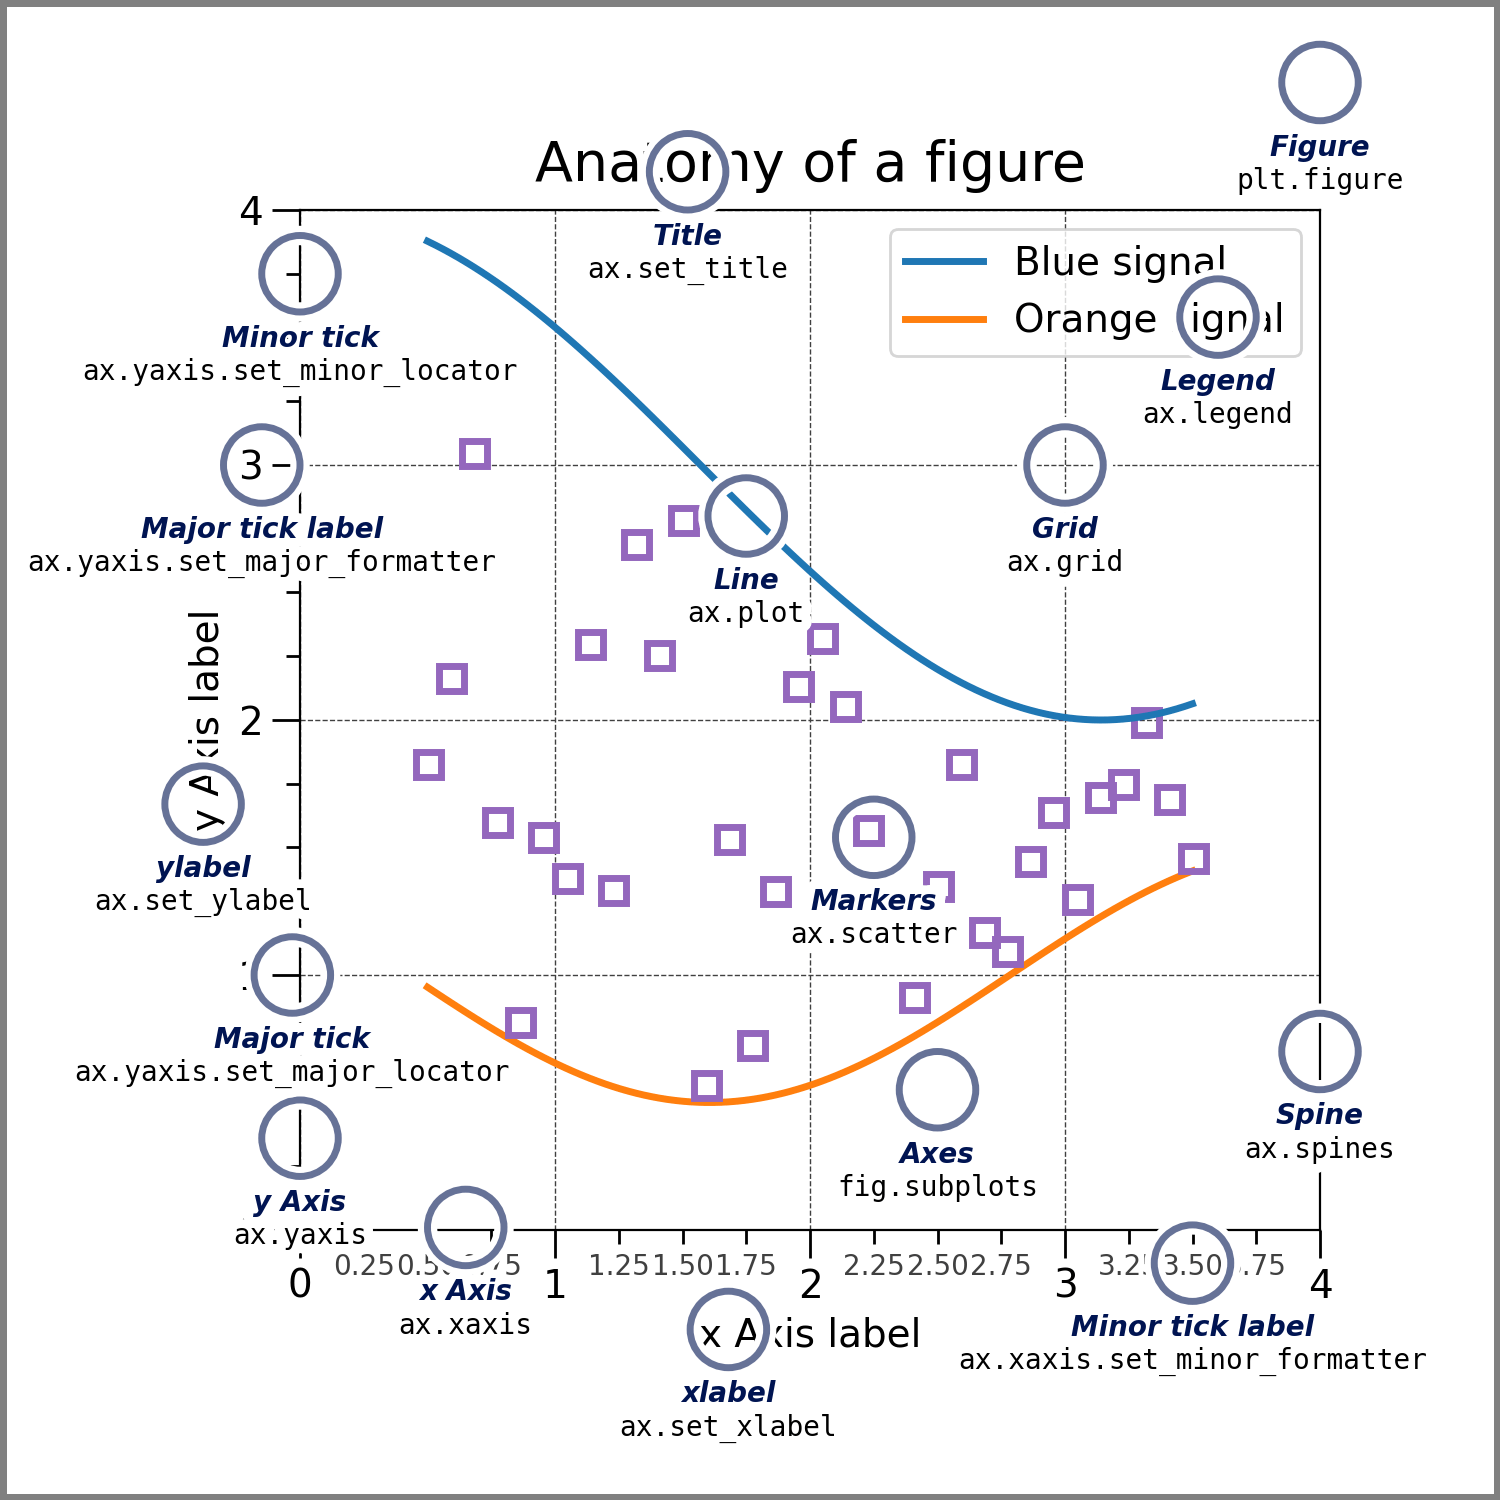

## plt.plot() Parameters:

**x (optional):** A sequence of numbers representing the x-axis data. If not provided, a default sequence of integers is used.

**y (optional):** A sequence of numbers representing the y-axis data. This is required.

**fmt (optional):** A format string specifying the color, marker, and line style. For example, 'ro' for red circles.

**data (optional):** A dictionary-like object containing the data to be plotted.

**kwargs (optional):** Additional keyword arguments to customize the plot, such as:

1.   linestyle: Specifies the line style (e.g., '-', '--', ':', '-.')
2.   linewidth: Sets the line width.
3.   color: Specifies the color (e.g., 'red', 'blue', 'green').
4.   marker: Specifies the marker style (e.g., 'o', 'x', '+').
5.   markersize: Sets the marker size.
6.   label: Sets the label for the plot line (used in legends).
7. alpha: Sets the transparency (0-1).
8. zorder: Sets the plotting order (higher values are plotted on top).


#Line Graph

neighbourhood_group
Bronx              875
Brooklyn         16439
Manhattan        16621
Queens            4572
Staten Island      314
Name: id, dtype: int64


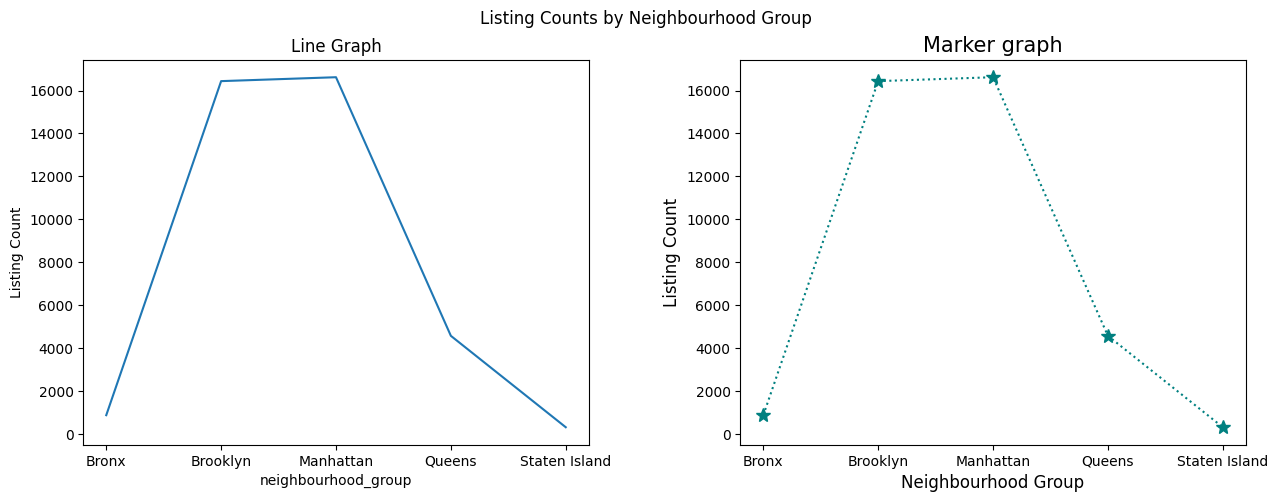

In [ ]:
x = df['neighbourhood_group'].unique()
x.sort()

y = df.groupby('neighbourhood_group')['id'].count()
print(y.head())

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Listing Counts by Neighbourhood Group')
axs[0].plot(x,y)
axs[0].set_xlabel('neighbourhood_group')
axs[0].set_ylabel('Listing Count')
axs[0].set_title('Line Graph')


axs[1].set_xlabel('Neighbourhood Group',fontsize = 12)
axs[1].set_ylabel('Listing Count',fontsize = 12)
axs[1].set_title('Marker graph',fontsize = 15)

axs[1].plot(x,y, marker='*', linestyle=':', color = 'teal',markersize= 10)
# linestyle supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
plt.show()



# Bar Plot

## Simple Bar Plot

neighbourhood_group
Bronx              875
Brooklyn         16439
Manhattan        16621
Queens            4572
Staten Island      314
Name: id, dtype: int64


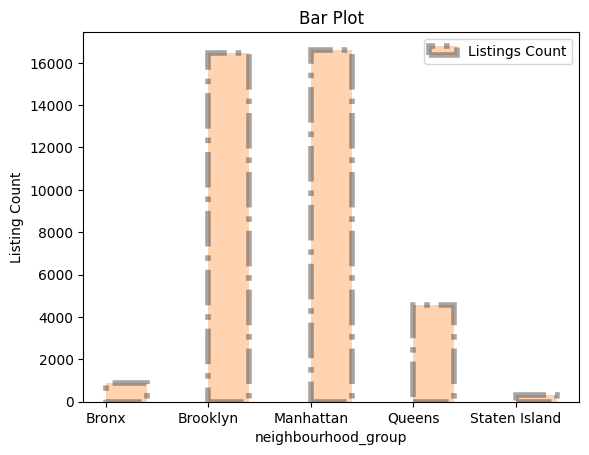

In [ ]:
x = df['neighbourhood_group'].unique()
x.sort()

y = df.groupby('neighbourhood_group')['id'].count()
print(y.head())

plt.bar(x,y,width=0.4,align='edge',color='#ffa763',edgecolor='#4a4a4a',alpha = 0.5,linewidth = 4,linestyle = 'dashdot',label='Listings Count')
plt.xlabel('neighbourhood_group')
plt.ylabel('Listing Count')
plt.title('Bar Plot')

plt.legend()
plt.show()


# To show plot-label you need to use legend
# use algin to change alignment of x-axis col names to edge/center

## Stacked Bar Graph

  neighbourhood_group neighbourhood  calculated_host_listings_count
0               Bronx      Allerton                              37
1               Bronx    Baychester                               6
2               Bronx       Belmont                              20
3               Bronx     Bronxdale                              16
4               Bronx   Castle Hill                               2


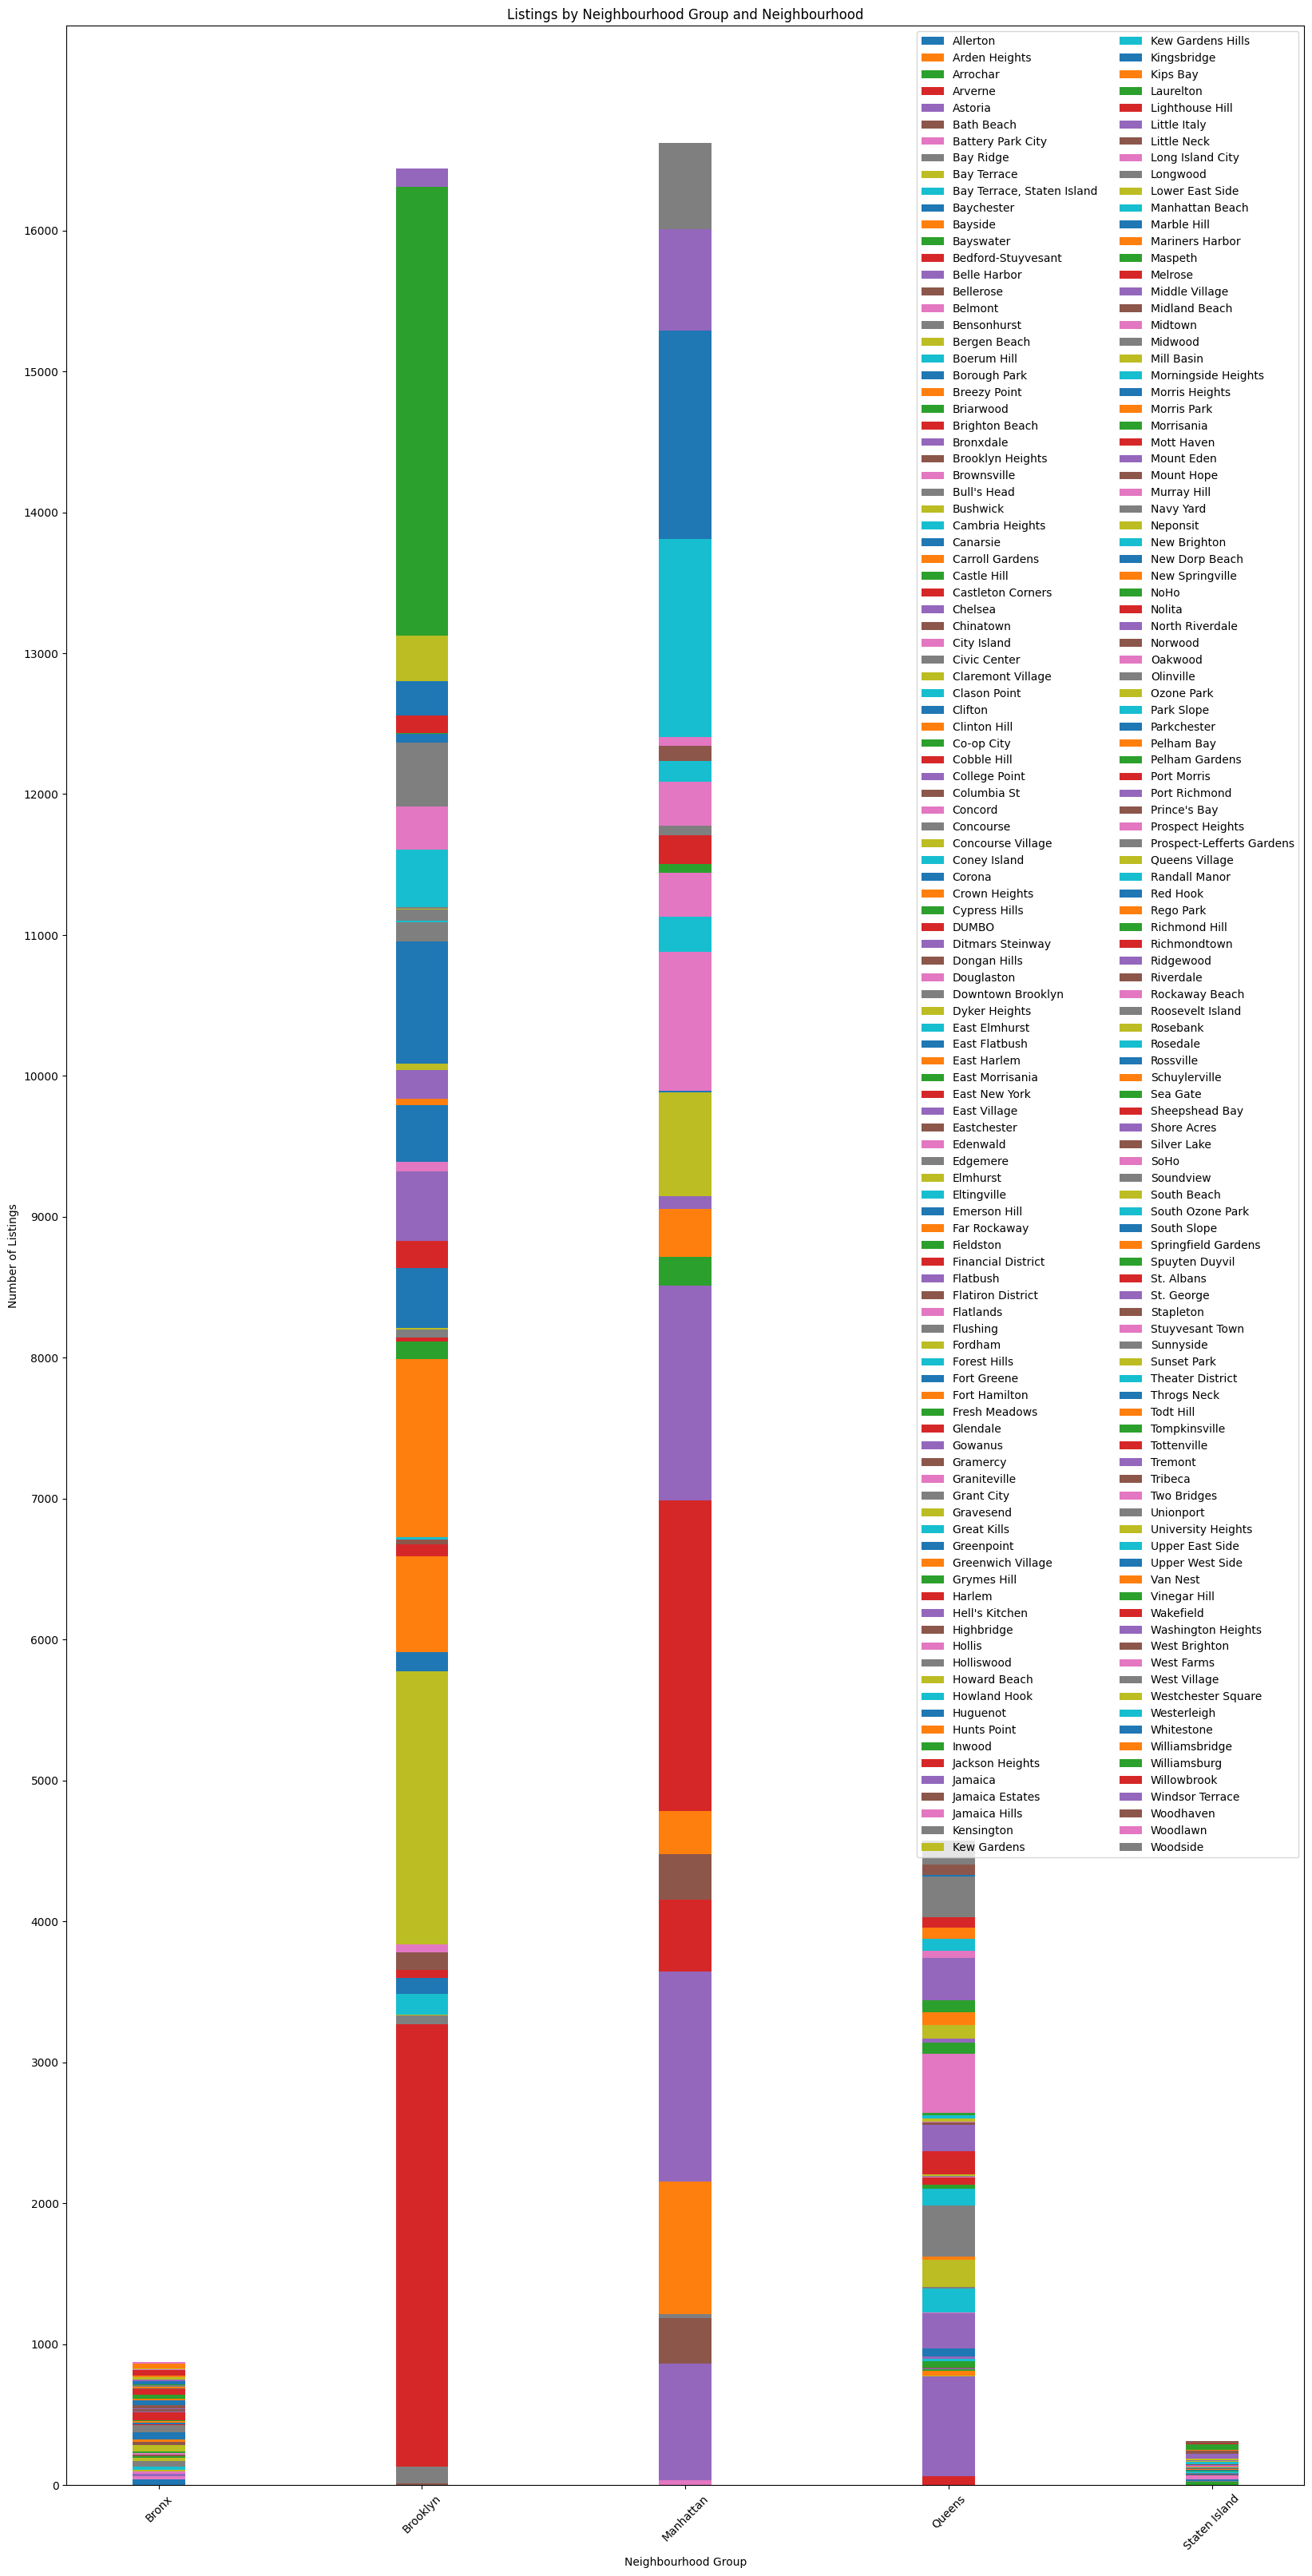

In [ ]:
grouped_data = df.groupby(['neighbourhood_group', 'neighbourhood'])['calculated_host_listings_count'].count().reset_index()
print(grouped_data.head())
pivot_table = grouped_data.pivot_table(index='neighbourhood_group', columns='neighbourhood', values='calculated_host_listings_count', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(20, 40),width=0.2)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.legend(loc='center right', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.5)
# Wrap the legend horizontally
plt.legend(ncol=2)
plt.yticks(range(0, 16500, 1000))

plt.title('Listings by Neighbourhood Group and Neighbourhood')
plt.xticks(rotation=45)
plt.show()


# To show plot-label you need to use legend
# use algin to change alignment of x-axis col names to edge/center

## Multiple Bar Graph

   neighbourhood_group        room_type    id
0                Bronx  Entire home/apt   308
1                Bronx     Private room   524
2                Bronx      Shared room    43
3             Brooklyn  Entire home/apt  8159
4             Brooklyn     Private room  7990
5             Brooklyn      Shared room   290
6            Manhattan  Entire home/apt  9962
7            Manhattan     Private room  6303
8            Manhattan      Shared room   356
9               Queens  Entire home/apt  1742
10              Queens     Private room  2678
11              Queens      Shared room   152
12       Staten Island  Entire home/apt   150
13       Staten Island     Private room   159
14       Staten Island      Shared room     5


Text(0, 0.5, 'No. of Listings')

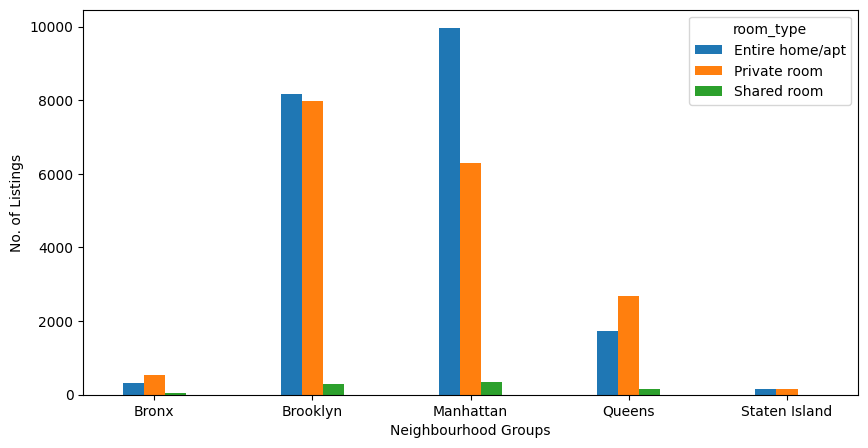

In [ ]:
# Show me how many diff types of rooms are there in each neighbourhood_group

grouped_data = df.groupby(['neighbourhood_group','room_type'])['id'].count().reset_index()
print(grouped_data)
pivot_table = grouped_data.pivot_table(index = 'neighbourhood_group',columns = 'room_type',values = 'id', fill_value=1)


pivot_table.plot(kind='bar', figsize=(10,5), width=0.4)
plt.xticks(rotation=0)
plt.xlabel('Neighbourhood Groups')
plt.ylabel('No. of Listings')

# fillna():

# Replaces missing values (NaNs or None) in a DataFrame or Series with a specified value.

## bar + horizontal == barh

<Axes: ylabel='neighbourhood_group,room_type'>

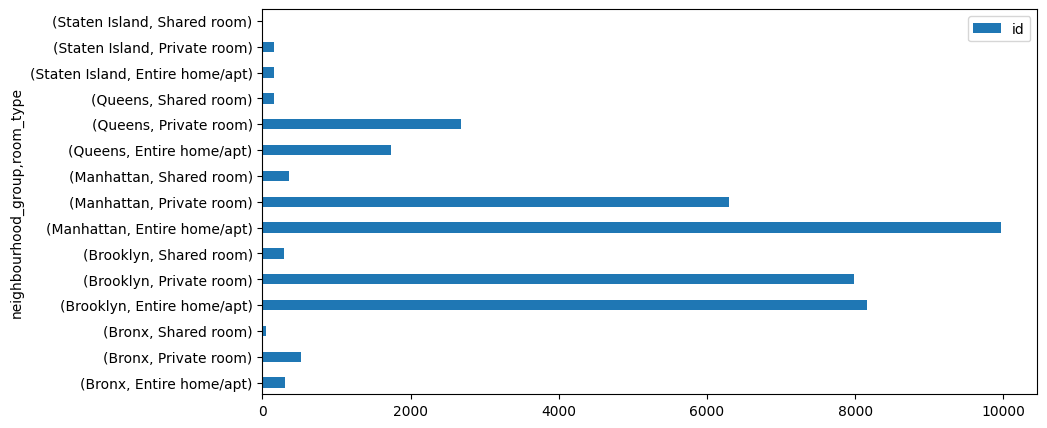

In [ ]:
grouped_data = df.groupby(['neighbourhood_group','room_type'])['id'].count().reset_index()
grouped_data = grouped_data.set_index(['neighbourhood_group','room_type'])
grouped_data

grouped_data.plot(kind='barh', figsize=(10,5), width=0.4)



  neighbourhood_group neighbourhood  calculated_host_listings_count
0               Bronx      Allerton                              37
1               Bronx    Baychester                               6
2               Bronx       Belmont                              20
3               Bronx     Bronxdale                              16
4               Bronx   Castle Hill                               2


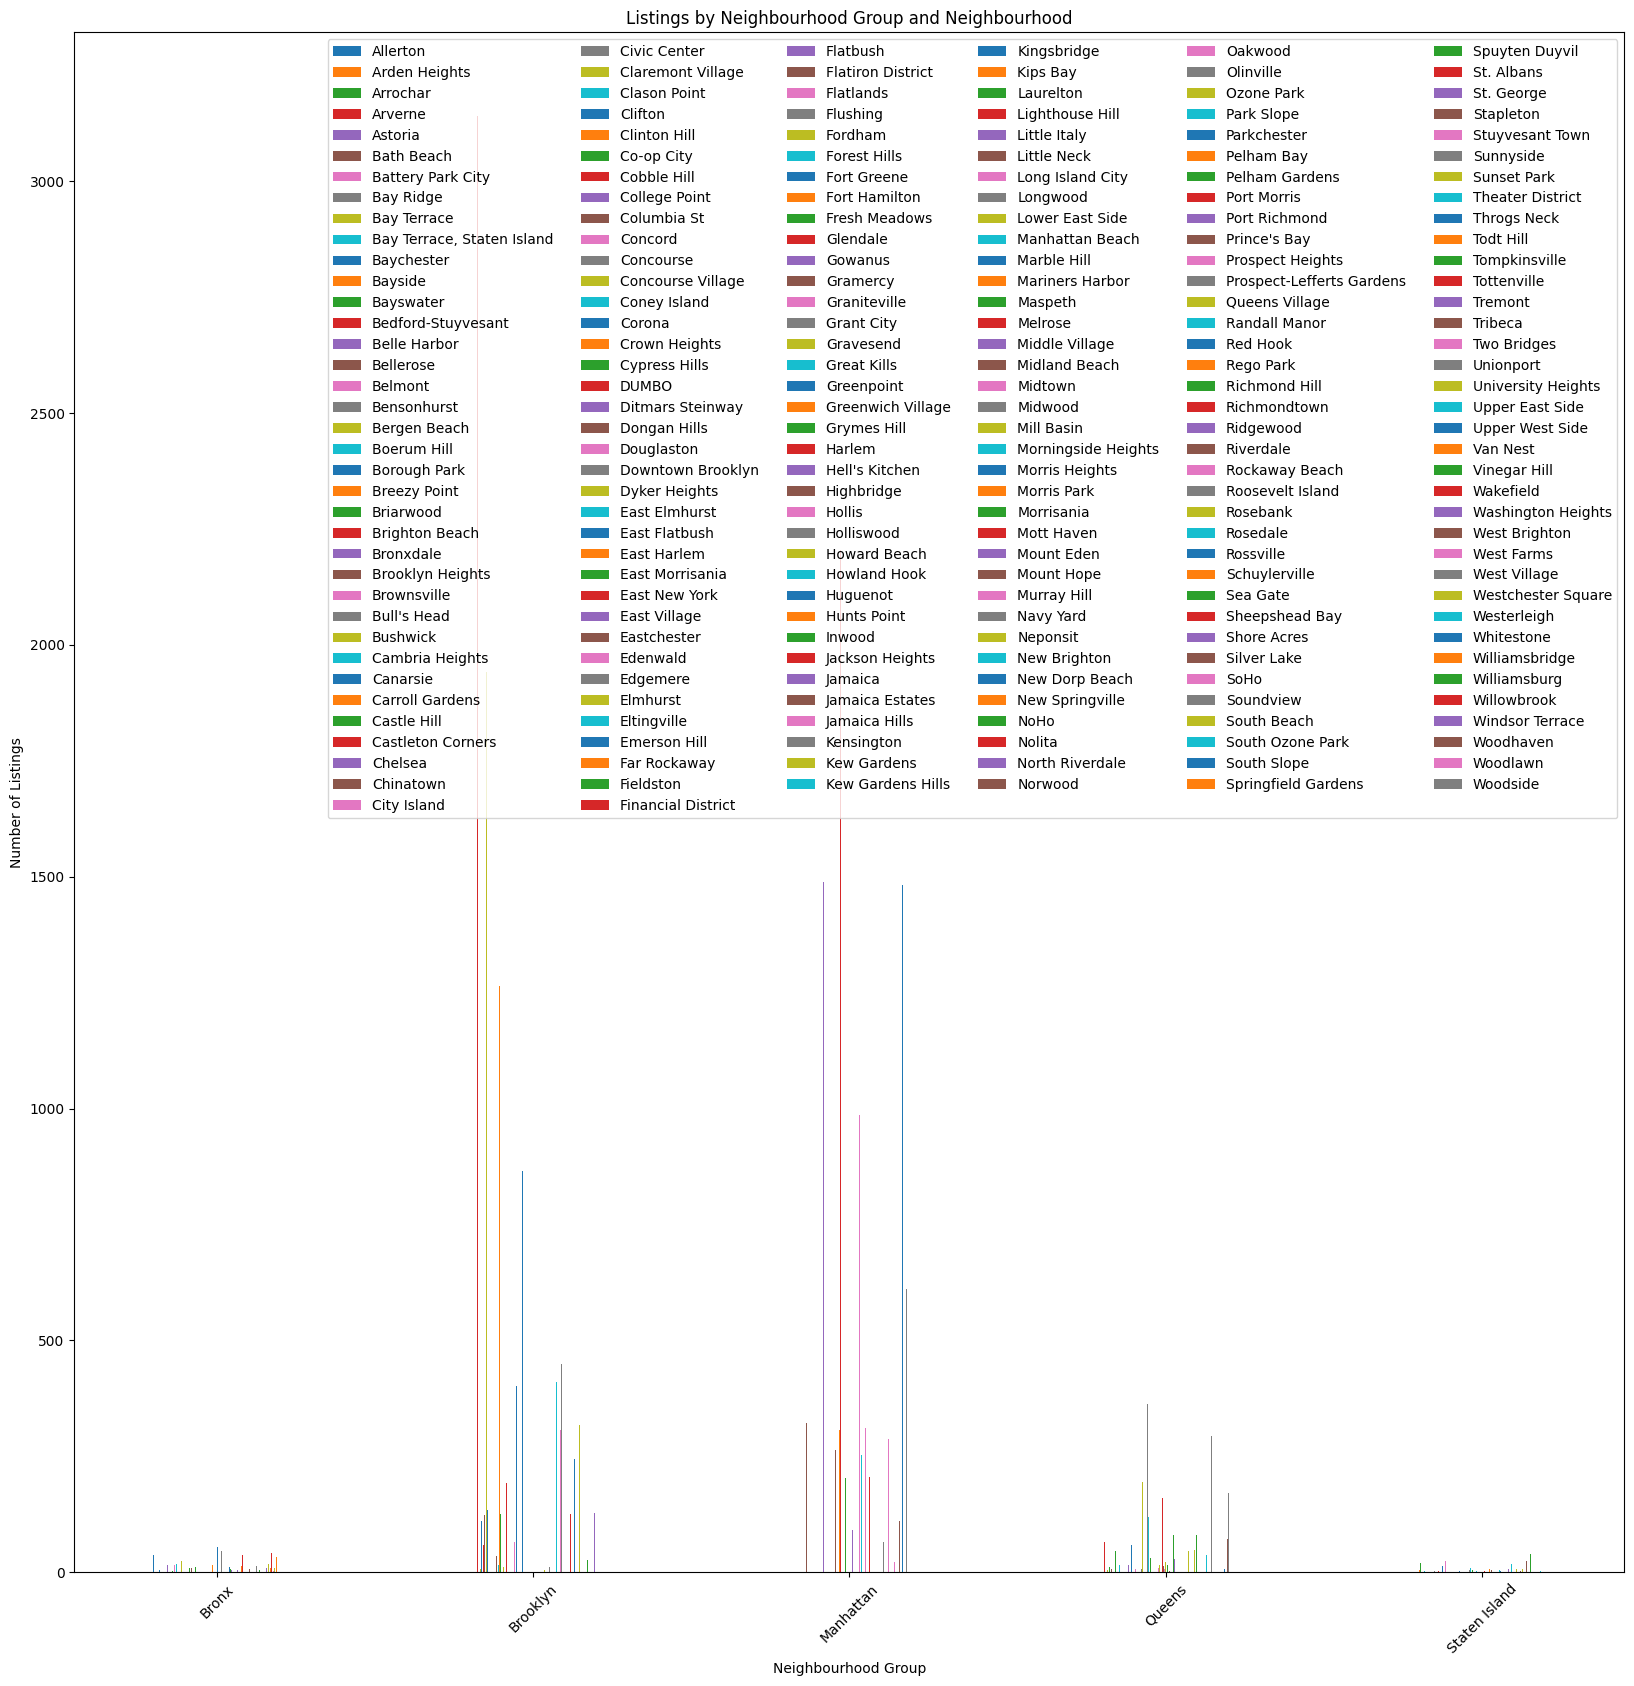

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'
grouped_data = df.groupby(['neighbourhood_group', 'neighbourhood'])['calculated_host_listings_count'].count().reset_index()
print(grouped_data.head())

pivot_table = grouped_data.pivot_table(index='neighbourhood_group', columns='neighbourhood', values='calculated_host_listings_count', fill_value=0)

pivot_table.plot(kind='bar', figsize=(20, 20), width=0.4)
plt.legend(ncol=6)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.title('Listings by Neighbourhood Group and Neighbourhood')
plt.xticks(rotation=45)
plt.show()

# ColorMaps
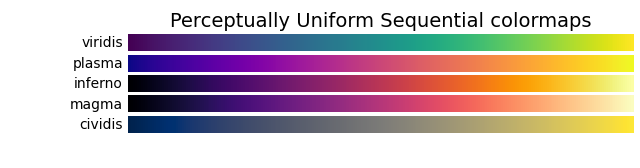

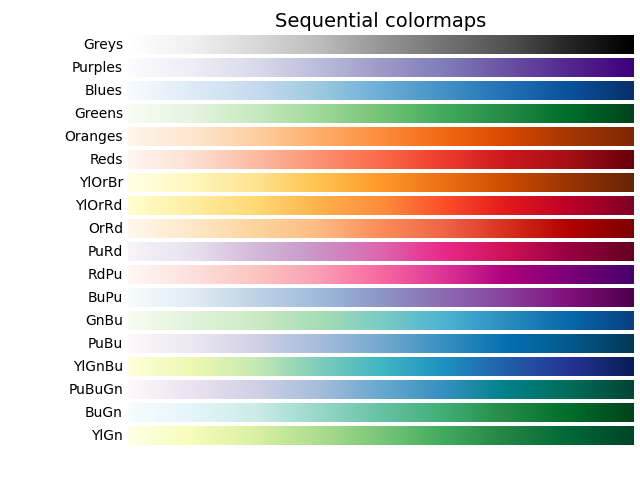

# Scatter Plot

1    225
4     80
5    200
7     79
8     79
Name: price, dtype: int64


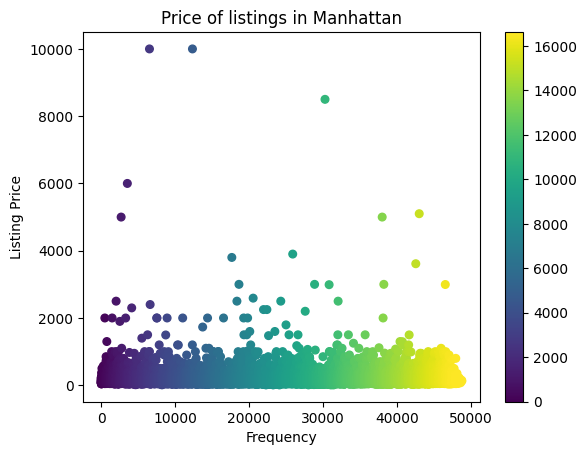

In [ ]:
# Prices of listings in Manhattan

x = df[df['neighbourhood_group'] == 'Manhattan']

print(x['price'].head())

colors = [f for f in range(len(x))]
plt.scatter(x.index, x['price'] ,c=colors,s =30,  cmap = 'viridis')
plt.colorbar()
plt.xlabel('Frequency')
plt.ylabel('Listing Price')
plt.title('Price of listings in Manhattan')

plt.show()


# To show plot-label you need to use legend
# use algin to change alignment of x-axis col names to edge/center

1    225
4     80
5    200
7     79
8     79
Name: price, dtype: int64


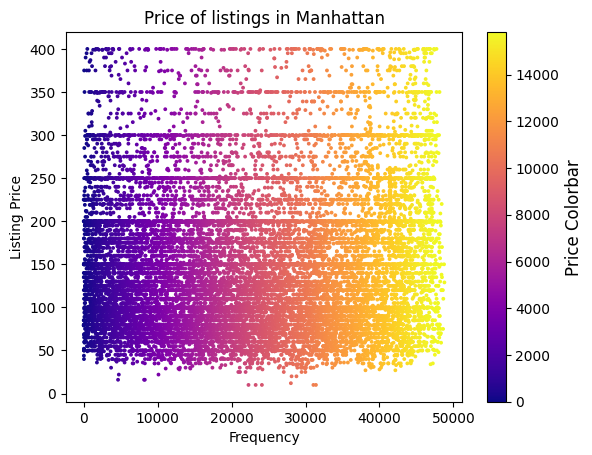

In [ ]:
# Prices of listings in Manhattan

x = df[(df['neighbourhood_group'] == 'Manhattan') & (df['price'] <= 400)]

print(x['price'].head())

colors = [f for f in range(len(x))]
plt.scatter(x.index, x['price'] ,c=colors,s =3,  cmap = 'plasma')
c = plt.colorbar()
c.set_label('Price Colorbar',fontsize = 12)
plt.xlabel('Frequency')
plt.ylabel('Listing Price')
plt.title('Price of listings in Manhattan')

plt.show()

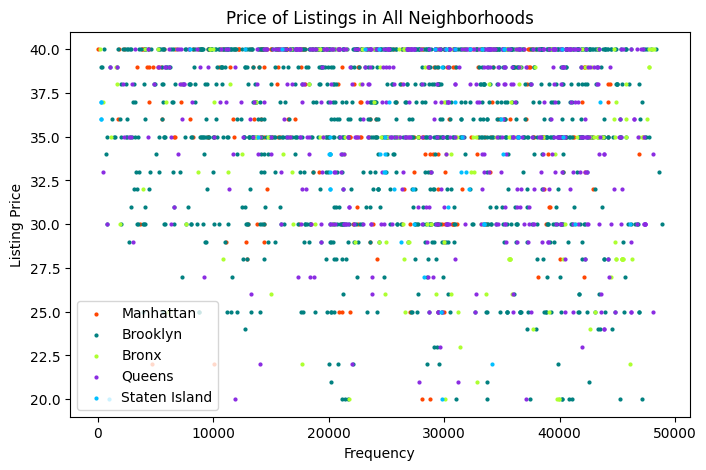

In [ ]:
# Prices of listings in All NeignbourHoods
lower_threshold = 20
higher_threshold = 40
ms = 4
neighborhoods = ['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island']
colors = ['orangered', 'teal', 'greenyellow', 'blueviolet', 'deepskyblue']
labels = neighborhoods

# Create an empty list to store filtered DataFrames
filtered_data = []

for i, neighborhood in enumerate(neighborhoods):
  filtered_df = df[(df['neighbourhood_group'] == neighborhood) &
                  (df['price'] <= higher_threshold) &
                  (df['price'] >= lower_threshold)]
  filtered_data.append(filtered_df)

plt.figure(figsize=(8, 5))

# Loop through filtered data and plot
for i, filtered_df in enumerate(filtered_data):
  plt.scatter(filtered_df.index, filtered_df['price'], color=colors[i],s =ms , label=labels[i])

plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Listing Price')
plt.title('Price of Listings in All Neighborhoods')
plt.show()

# Histogram Graph



Text(0.5, 1.0, 'Price of listings in Manhattan')

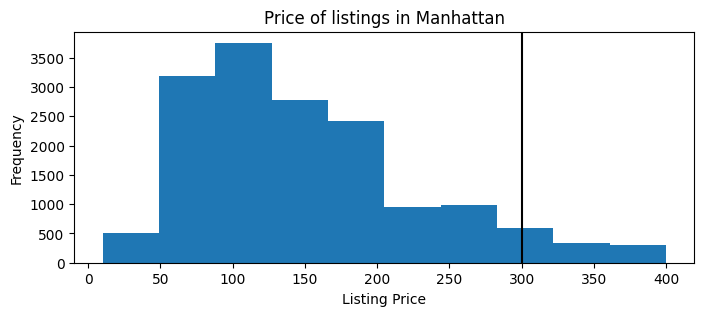

In [ ]:
# Prices of listings in Manhattan
x = df[(df['neighbourhood_group'] == 'Manhattan') & (df['price'] <= 400)]

# print(x['price'].head())
plt.figure(figsize=(8, 3))
plt.hist(x['price'])
plt.xlabel('Listing Price')
plt.axvline(300,color = '#000') # separates graph
plt.ylabel('Frequency')
plt.title('Price of listings in Manhattan')

Text(0.5, 1.0, 'Price of listings in Manhattan')

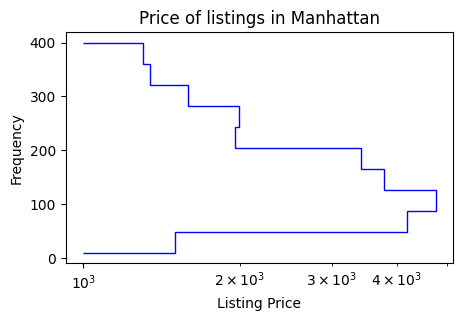

In [ ]:
# Prices of listings in Manhattan
x = df[(df['neighbourhood_group'] == 'Manhattan') & (df['price'] <= 400)]

# print(x['price'].head())
plt.figure(figsize=(5,3))
plt.hist(x['price'], bottom = 1000,edgecolor = 'b',histtype = 'step',orientation = 'horizontal',log = True)
#  bottom makes the y axis start from where u want
plt.xlabel('Listing Price')
plt.ylabel('Frequency')
plt.title('Price of listings in Manhattan')

# Pie Chart

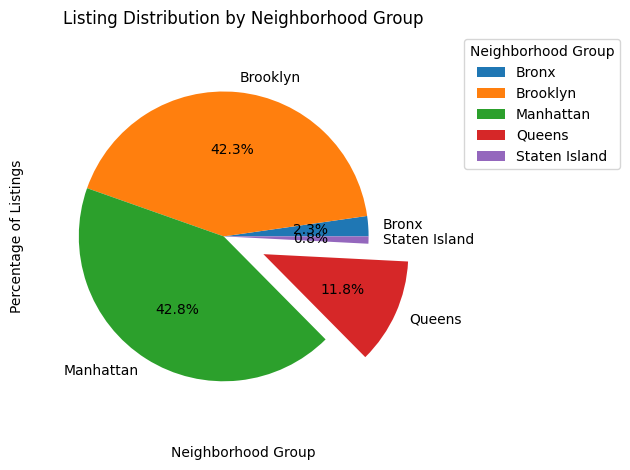

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


x = df['neighbourhood_group'].unique()
x.sort()

y = df.groupby('neighbourhood_group')['id'].count()
e= [0.0,0.0,0.0,0.3,0.0] # explode pulls the part from the pie

plt.pie(y, labels=x, autopct="%0.1f%%",explode = e)
# %0.1f%% = no of floating pt digits in %

plt.title('Listing Distribution by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Percentage of Listings')
plt.legend(title='Neighborhood Group', loc='upper left', bbox_to_anchor=(1,1 ))

plt.axis('equal')

plt.tight_layout()

plt.show()

# Box Plot

Text(0.5, 1.0, 'Price of listings in Manhattan')

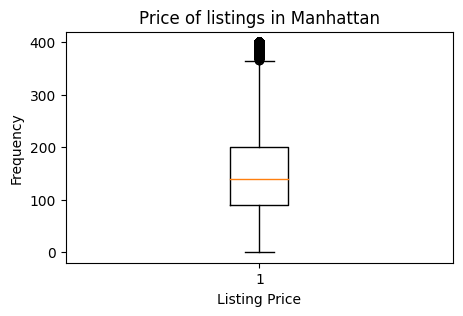

In [9]:
# Prices of listings in Manhattan
x = df[(df['neighbourhood_group'] == 'Manhattan') & (df['price'] <= 400)]

# print(x['price'].head())
plt.figure(figsize=(5,3))
plt.boxplot(x['price'])
#  bottom makes the y axis start from where u want
plt.xlabel('Listing Price')
plt.ylabel('Frequency')
plt.title('Price of listings in Manhattan')

# Volin Plot

Text(0.5, 1.0, 'Price of listings in Manhattan')

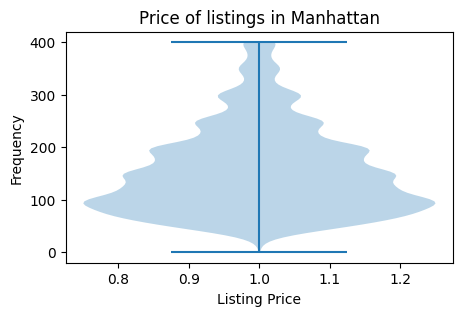

In [14]:
# Prices of listings in Manhattan
x = df[(df['neighbourhood_group'] == 'Manhattan') & (df['price'] <= 400)]

# print(x['price'].head())
plt.figure(figsize=(5,3))
plt.violinplot(x['price'])
#  bottom makes the y axis start from where u want
plt.xlabel('Listing Price')
plt.ylabel('Frequency')
plt.title('Price of listings in Manhattan')

In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Animations using Matplotlib

# Faster rendering by using blitting